In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
face_cascade=cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')

In [3]:
skip = 0
face_data = []
dataset_path = ''
file_name = input("Enter the name of the person : ")

Enter the name of the person : Mummy


In [4]:
# This is the formation of training dataset
cap=cv2.VideoCapture(0)
while True:
    ret,frame = cap.read()
    
    if ret==False:
        continue
#     frame_gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(frame) #each face is a tuple, tuples are saved in list
    faces = sorted(faces,key=lambda f:f[2]*f[3])
    
    # Pick the last face (because it is the largest face acc. to area(f[2]*f[3]))
    for face in faces:
        x,y,w,h = face
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)

        #Extract (Crop out the required face) : Region of Interest
        offset = 10
        face_section = frame[y-offset:y+h+offset,x-offset:x+w+offset]
        face_section = cv2.resize(face_section,(100,100))

        skip += 1
        if skip%10==0:
            face_data.append(face_section)
            print(len(face_data))



    cv2.imshow("Frame",frame) 
    #cv2.imshow("Face Section",face_section)
    
    key_pressed=cv2.waitKey(1) & 0xFF
    if key_pressed==ord('q'):
        break
        
# Convert our face list array into a numpy array
face_data = np.asarray(face_data) #Converting the list into numpy array
face_data = face_data.reshape((face_data.shape[0],-1))
print(face_data.shape)

# Save this data into file system
np.save(dataset_path+file_name+'.npy',face_data)
print("Data Successfully save at "+dataset_path+file_name+'.npy')

cap.release()
cv2.destroyAllWindows()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
(25, 30000)
Data Successfully save at Mummy.npy


In [42]:
face_data

array([[ 75,  74, 128, ..., 127, 146, 173],
       [ 73,  78, 124, ..., 125, 146, 174],
       [ 81,  85, 150, ..., 136, 145, 171],
       ...,
       [ 63,  72,  94, ..., 144, 151, 185],
       [100, 150, 196, ..., 136, 155, 183],
       [ 82,  88, 109, ..., 110, 122, 138]], dtype=uint8)

In [19]:
x=[1,2,3,[2,4,5,6,9]]
np.asarray(x)

array([1, 2, 3, list([2, 4, 5, 6, 9])], dtype=object)

# Full Implementation

In [5]:
import cv2
import numpy as np 
import os 
import matplotlib.pyplot as plt

In [6]:
def distance(v1, v2):
    # Eucledian 
    return np.sqrt(((v1-v2)**2).sum())

In [7]:
def knn(train, test, k=5):
    dist = []

    for i in range(train.shape[0]):
        # Get the vector and label
        ix = train[i, :-1]
        iy = train[i, -1]
        # Compute the distance from test point
        d = distance(test, ix)
        dist.append([d, iy])
    # Sort based on distance and get top k
    dk = sorted(dist, key=lambda x: x[0])[:k]
    # Retrieve only the labels
    labels = np.array(dk)[:, -1]

    # Get frequencies of each label
    output = np.unique(labels, return_counts=True)  
    # Find max frequency and corresponding label
    index = np.argmax(output[1])
    return output[0][index]

In [70]:
cap = cv2.VideoCapture(0)

# Face Detection
face_cascade = cv2.CascadeClassifier("data/haarcascade_frontalface_alt.xml")

skip = 0
dataset_path = '/Users/Anurag Anand/'

face_data = [] 
labels = []

class_id = 0 # Labels for the given file
names = {} #Mapping btw id - name

# Data Preparation
for fx in os.listdir(dataset_path):
    if fx.endswith('.npy'):
        #Create a mapping btw class_id and name
        names[class_id] = fx[:-4]
        print("Loaded "+fx)
        data_item = np.load(dataset_path+fx) #filename with its path
        face_data.append(data_item) #have first face, second face etc -> This stores the array values of the train images

        #Create Labels for the class
        target = class_id*np.ones((data_item.shape[0],)) 
        class_id += 1
        labels.append(target)

face_dataset = np.concatenate(face_data,axis=0) # This is for flattening along the rows
face_labels = np.concatenate(labels,axis=0).reshape((-1,1)) # This also flattens

print(face_dataset.shape)
print(face_labels.shape)

trainset = np.concatenate((face_dataset,face_labels),axis=1)
print(trainset.shape)


# Testing 

while True:
    ret,frame = cap.read()
    if ret == False:
        continue

    faces = face_cascade.detectMultiScale(frame,1.3,5)
    if(len(faces)==0):
        continue

    for face in faces:
        x,y,w,h = face

        #Get the face ROI
        offset = 10
        face_section = frame[y-offset:y+h+offset,x-offset:x+w+offset]
        face_section = cv2.resize(face_section,(100,100))

        #Predicted Label (out)
        out = knn(trainset,face_section.flatten())

        #Display on the screen the name and rectangle around it
        pred_name = names[int(out)]
        cv2.putText(frame,pred_name,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2,cv2.LINE_AA)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)

    cv2.imshow("Faces",frame)

    key = cv2.waitKey(1) & 0xFF
    if key==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Loaded Anurag.npy
(6, 30000)
(6, 1)
(6, 30001)


In [78]:
 import os
dir_list=os.listdir('/Users/')
print(dir_list)

['All Users', 'Anurag Anand', 'Default', 'Default User', 'desktop.ini', 'Public', 'TEMP']


In [76]:
data_item.shape,target.shape

((6, 30000), (6,))

Loaded Anurag.npy
Loaded Mummy.npy
(31, 30000)
(31, 1)
(31, 30001)


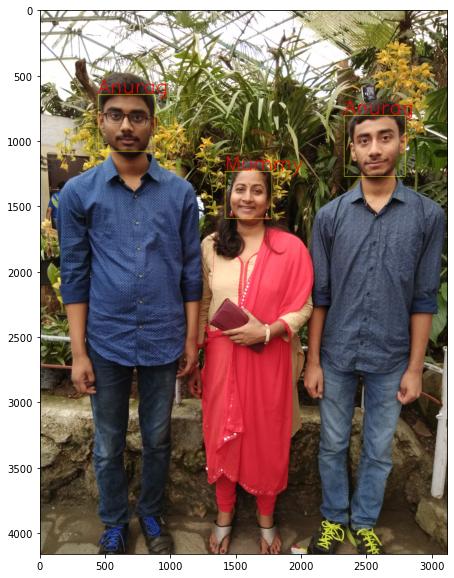

In [11]:
# Testing For static images

# Face Detection
face_cascade = cv2.CascadeClassifier("data/haarcascade_frontalface_alt.xml")

skip = 0
dataset_path = '/Users/Anurag Anand/'

face_data = [] 
labels = []

class_id = 0 # Labels for the given file
names = {} #Mapping btw id - name

# Data Preparation
for fx in os.listdir(dataset_path):
    if fx.endswith('.npy'):
        #Create a mapping btw class_id and name
        names[class_id] = fx[:-4]
        print("Loaded "+fx)
        data_item = np.load(dataset_path+fx) #filename with its path
        face_data.append(data_item) #have first face, second face etc -> This stores the array values of the train images

        #Create Labels for the class
        target = class_id*np.ones((data_item.shape[0],)) 
        class_id += 1
        labels.append(target)

face_dataset = np.concatenate(face_data,axis=0) # This is for flattening along the rows
face_labels = np.concatenate(labels,axis=0).reshape((-1,1)) # This also flattens

print(face_dataset.shape)
print(face_labels.shape)

trainset = np.concatenate((face_dataset,face_labels),axis=1)
print(trainset.shape)


# Testing 

frame=cv2.imread('IMG_20180606_122200')

faces = face_cascade.detectMultiScale(frame,1.3,5)
        
for face in faces:
    x,y,w,h = face

    #Get the face ROI
    offset = 10
    face_section = frame[y-offset:y+h+offset,x-offset:x+w+offset]
    face_section = cv2.resize(face_section,(100,100))

    #Predicted Label (out)
    out = knn(trainset,face_section.flatten())

    #Display on the screen the name and rectangle around it
    pred_name = names[int(out)]
    cv2.putText(frame,pred_name,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,5,(0,0,255),5,cv2.LINE_AA)
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)

# cv2.imshow("Faces",frame)   
figure=plt.figure(figsize=(10,10))
frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.imshow(frame)

# Hand Detection and Tracking

In [7]:
import cv2
from cvzone.HandTrackingModule import HandDetector

cap=cv2.VideoCapture(0)
#create object detector
detector= HandDetector(detectionCon=0.8) # Detector is an object of HandDetector Class


while True:
    success,img=cap.read()
    hands,img= detector.findHands(img)#going to return img with drawing
    #for each hand we'll have info like Hand-->dict{lmList,boundingbox,center,type}
    if hands: 
        hand1=hands[0]#gives us first hand
        lmList1=hand1["lmList"]# List of 21 landmarks
        bbox1=hand1["bbox"]#x,y,w,h of bounding box
        centerPoint1=hand1["center"]#center of the hand cx,cy
        handType1=hand1["type"]#left or right
        finger1=detector.fingersUp(hand1)
        length,info,img=detector.findDistance(lmList1[8],lmList1[12],img)

    if len(hands)==2:
        hand2=hands[1]#gives us second hand
        lmList2=hand2["lmList"]# List of  21 landmarks
        bbox2=hand2["bbox"]#x,y,w,h of bounding box
        centerPoint2=hand2["center"]#center of the hand cx,cy
        handType2=hand2["type"]#left or right
        finger2=detector.fingersUp(hand2)
        length,info,img=detector.findDistance(lmList1[8],lmList2[8],img)
        length,info,img=detector.findDistance(centerPoint1,centerPoint2,img)



    cv2.imshow("Image",img)


    #Wait for user input - q, then you will stop the loop
    key_pressed = cv2.waitKey(1) & 0xFF #it will wait for 1 mili second bitwise and 
    if key_pressed == ord('q'): #ord tells you ascii value of that character
        break

cap.release()
cv2.destroyAllWindows()

In [1]:
from cvzone.FaceDetectionModule import FaceDetector
import cv2

cap = cv2.VideoCapture(0)
detector = FaceDetector()

while True:
    success, img = cap.read()
    img, bboxs = detector.findFaces(img)

    if bboxs:
        # bboxInfo - "id","bbox","score","center"
        center = bboxs[0]["center"]
        cv2.circle(img, center, 5, (255, 0, 255), cv2.FILLED)

    cv2.imshow("Image", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# FPS in Face Detection

In [2]:
import time
import cv2


class FPS:
    """
    Helps in finding Frames Per Second and display on an OpenCV Image
    """

    def __init__(self):
        self.pTime = time.time()

    def update(self, img=None, pos=(20, 50), color=(255, 0, 0), scale=3, thickness=3):
        """
        Update the frame rate
        :param img: Image to display on, can be left blank if only fps value required
        :param pos: Position on the FPS on the image
        :param color: Color of the FPS Value displayed
        :param scale: Scale of the FPS Value displayed
        :param thickness: Thickness of the FPS Value displayed
        :return:
        """
        cTime = time.time()
        try:
            fps = 1 / (cTime - self.pTime)
            self.pTime = cTime
            if img is None:
                return fps
            else:
                cv2.putText(img, f'FPS: {int(fps)}', pos, cv2.FONT_HERSHEY_PLAIN,
                            scale, color, thickness)
                return fps, img
        except:
            return 0


def main():
    """
    Without Webcam
    """
    fpsReader = FPS()
    while True:
        time.sleep(0.025)  # add delay to get 40 Frames per second
        fps = fpsReader.update()
        print(fps)


def mainWebcam():
    """
    With Webcam
    """
    fpsReader = FPS()
    cap = cv2.VideoCapture(0)
    while cap.isOpened():
        success, img = cap.read()
        fps, img = fpsReader.update(img)
        cv2.imshow("Image", img)
        key_pressed = cv2.waitKey(1) & 0xFF #it will wait for 1 mili second bitwise and 
        if key_pressed == ord('q'): #ord tells you ascii value of that character
            break
    cap.release()
    cv2.destroyAllWindows()


if __name__ == "__main__":
    # main()
    mainWebcam()